In [151]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [152]:
# variant 27
# f(x) = sin^2( cos (x) )
# [-1.5, 1.5]

In [153]:
# parameters that can be changed

n = 14            # number of points

In [154]:
# function declaration

a = -1.5
b = 1.5
h = (b - a) / (n - 1)

x = symbols('x')
f_x = (sin(cos(x)))**2
f_x

sin(cos(x))**2

In [155]:
# 1st derivative

derivative_f_x = diff(f_x, x)
derivative_f_x

-2*sin(x)*sin(cos(x))*cos(cos(x))

In [156]:
# defenition of fragmentation

coords = []
h = (b - a) / (n - 1)
print("h: ", h)
for i in range(n):
    coords.append(a + i * h)
#coords

h:  0.23076923076923078


In [157]:
# counting right derivative 

right_derivative = []
right_derivative_coords = []
for i in range(n - 1):
    right_derivative_coords.append(coords[i])
    curr_right_derivate = (f_x.subs('x', coords[i + 1]) - f_x.subs('x', coords[i])) / h
    right_derivative.append(curr_right_derivate) 
#right_derivative

In [158]:
# checking right derivative

check_coords = right_derivative_coords

check_values = []
for i in range(len(check_coords)):
    check_values.append(derivative_f_x.subs(x, check_coords[i]).n())
#check_values

current_values = right_derivative

deviation = []
for i in range(len(check_coords)):
    deviation.append(abs(check_values[i] - current_values[i]))
max(deviation)

0.208872411883158

In [159]:
# counting central derivative 

central_derivative = []
central_derivative_coords = []
for i in range(1, n - 1):
    central_derivative_coords.append(coords[i])
    curr_central_derivate = (f_x.subs('x', coords[i + 1]) - f_x.subs('x', coords[i - 1])) / (2 * h)
    central_derivative.append(curr_central_derivate)
#central_derivative

In [160]:
# checking central derivative

check_coords = central_derivative_coords

check_values = []
for i in range(len(check_coords)):
    check_values.append(derivative_f_x.subs(x, check_coords[i]).n())
#check_values

current_values = central_derivative

deviation = []
for i in range(len(check_coords)):
    deviation.append(abs(check_values[i] - current_values[i]))
max(deviation)

0.0371853914719754

In [161]:
# make interpolation (from previous task) for making plots of derivatives

def interolateFunc(f_x, a, b, coords, values):
    x = symbols('x')
    F_x = 0
    for i in range(len(coords)):
        curr = values[i]
        for k in range(len(coords)):
            if k != i:
                curr *= (x - coords[k]) / (coords[i] - coords[k])
        F_x += curr
    check_coords = []
    for i in range(len(coords) - 1):
        check_coords.append((coords[i + 1] + coords[i]) / 2)
    check_values = []
    for i in range(len(check_coords)):
        check_values.append(f_x.subs(x, check_coords[i]).n())
    current_values = []
    for i in range(len(check_coords)):
        current_values.append(F_x.subs(x, check_coords[i]).n())
    abses = []
    for i in range(len(check_coords)):
        abses.append(np.absolute(check_values[i] - current_values[i]))
    return [max(abses), (x, a, b), F_x, f_x]

0.0321564249655585


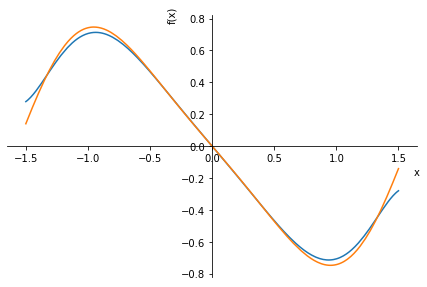

In [162]:
# plotting central derivatives (blue - counted, orange - original)

result = interolateFunc(derivative_f_x, coords[0], coords[-1], central_derivative_coords[1:-1], central_derivative[1:-1])
print(result[0])
plot(result[2], result[3], result[1])

0.170728198758813


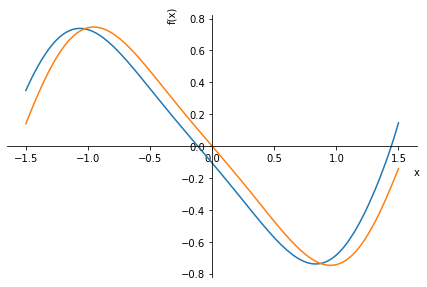

In [163]:
# plotting right derivatives (blue - counted, orange - original)

result = interolateFunc(derivative_f_x, coords[0], coords[-1], right_derivative_coords, right_derivative)
print(result[0])
plot(result[2], result[3], result[1])

In [164]:
# 2nd derivative

second_derivative_f_x = diff(derivative_f_x)
second_derivative_f_x

-2*sin(x)**2*sin(cos(x))**2 + 2*sin(x)**2*cos(cos(x))**2 - 2*sin(cos(x))*cos(x)*cos(cos(x))

In [165]:
# counting 2nd derivative with accuracy 2

central_second_derivative_2 = []
central_second_derivative_2_coords = []
for i in range(1, n - 1):
    central_second_derivative_2_coords.append(coords[i])
    curr_central_second_derivative_2 = (f_x.subs('x', coords[i + 1]) - 2 * f_x.subs('x', coords[i]) + f_x.subs('x', coords[i - 1])) / (h * h)
    central_second_derivative_2.append(curr_central_second_derivative_2)
#central_second_derivative_2

0.0357940352077871


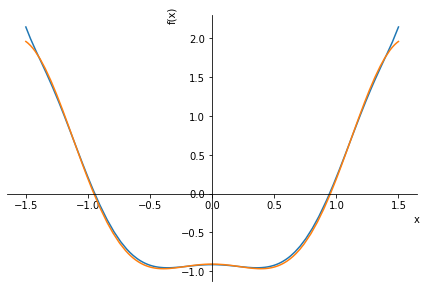

In [167]:
# plotting 2nd derivative (2)

result = interolateFunc(second_derivative_f_x, a, b, central_second_derivative_2_coords, central_second_derivative_2)
print(result[0])
plot(result[2], result[3], result[1])

In [168]:
# counting 2nd derivative with accuracy 4

central_second_derivative_4 = []
central_second_derivative_4_coords = []
for i in range(2, n - 2):
    central_second_derivative_4_coords.append(coords[i])
    curr_central_second_derivative_4 = (-1/12 * f_x.subs('x', coords[i + 2]) + 4/3 * f_x.subs('x', coords[i + 1]) - 5/2 * f_x.subs('x', coords[i]) + 4/3 * f_x.subs('x', coords[i - 1]) - 1/12 * f_x.subs('x', coords[i - 2])) / (h * h)
    central_second_derivative_4.append(curr_central_second_derivative_4)
#central_second_derivative_2

0.00593912865012047


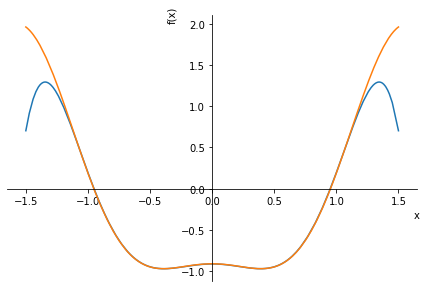

In [170]:
# plotting 2nd derivative (4)

result1 = interolateFunc(second_derivative_f_x, a, b, central_second_derivative_4_coords, central_second_derivative_4)
print(result1[0])
plot(result1[2], result1[3], result1[1])